<a href="https://colab.research.google.com/github/MYElmasry/DBSCAN-VS-KMeans/blob/main/DBSCAN_VS_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
# Import Libraries
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

In [234]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0, cluster_std=0.25)
X.shape

(1000, 2)

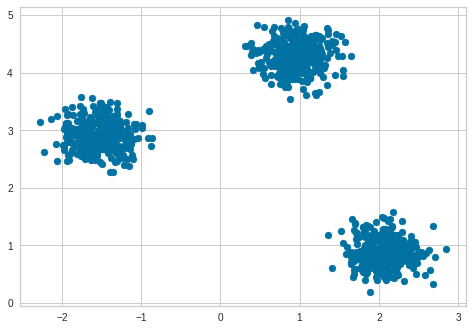

In [235]:
#plot the data
plt.scatter(X[:,0], X[:,1])
plt.show()

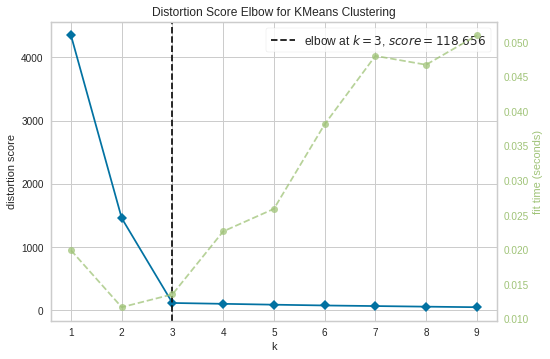

In [236]:
#elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

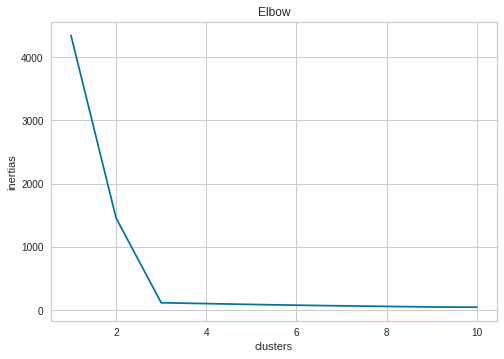

In [237]:
ilist = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)
  
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

In [238]:
#apply kmeans
kmeans = KMeans(n_clusters=3)
results = kmeans.fit_predict(X)

In [239]:
#cluster centers of kmeans
clusters = kmeans.cluster_centers_
clusters

array([[-1.53641556,  2.92618836],
       [ 2.07338302,  0.89021751],
       [ 0.94679786,  4.29174638]])

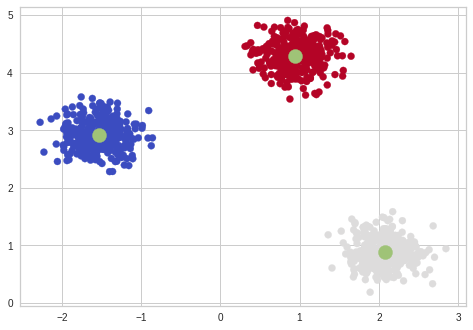

In [240]:
plt.scatter(X[:,0], X[:,1], c=results, cmap="coolwarm")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'g')
plt.show()

In [241]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

In [242]:
dbscan.labels_

array([0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2,

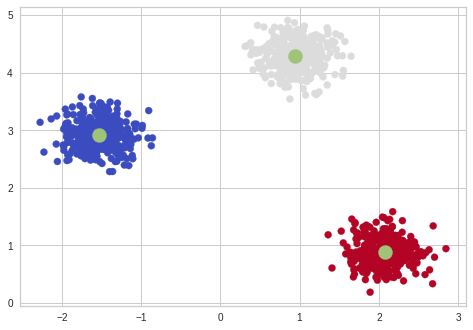

In [243]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap="coolwarm")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'g')
plt.show()

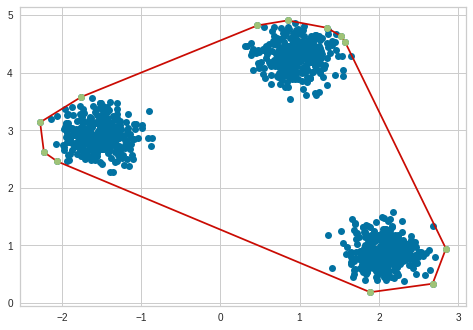

In [244]:
hull = ConvexHull(X)
plt.plot(X[:,0], X[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'r')
plt.plot(X[hull.vertices, 0], X[hull.vertices, 1], 'o', lw=2)
plt.show()

In [245]:
X, _ = make_circles(n_samples=1000)
X.shape

(1000, 2)

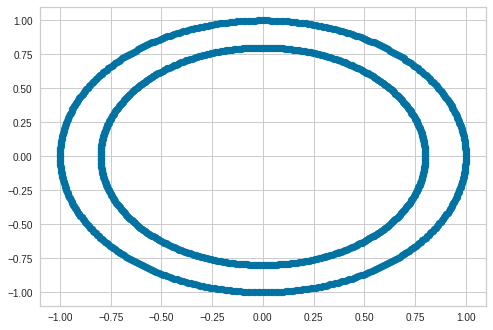

In [246]:
#plot the data
plt.scatter(X[:,0], X[:,1])
plt.show()

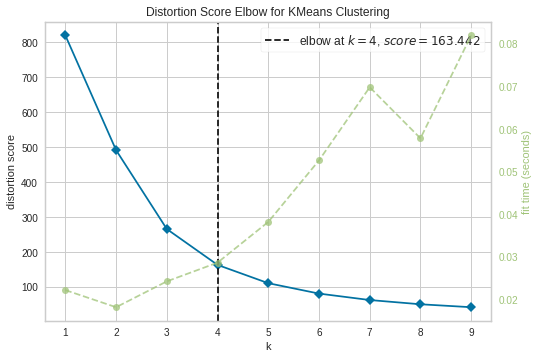

In [247]:
#elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

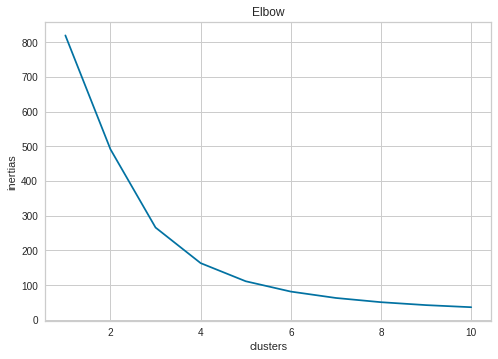

In [248]:
ilist = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)
  
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

In [249]:
#apply kmeans
kmeans = KMeans(n_clusters=4)
results = kmeans.fit_predict(X)

In [250]:
#cluster centers of kmeans
clusters = kmeans.cluster_centers_
clusters

array([[ 0.590676  , -0.55468169],
       [-0.59759952,  0.54721543],
       [ 0.55001023,  0.59312588],
       [-0.55190202, -0.59516596]])

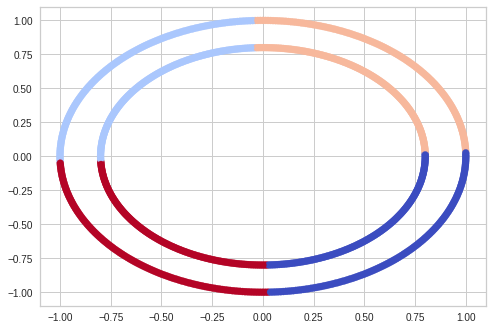

In [251]:
plt.scatter(X[:,0], X[:,1], c=results, cmap="coolwarm")
plt.show()

In [253]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=3)

In [254]:
dbscan.labels_

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

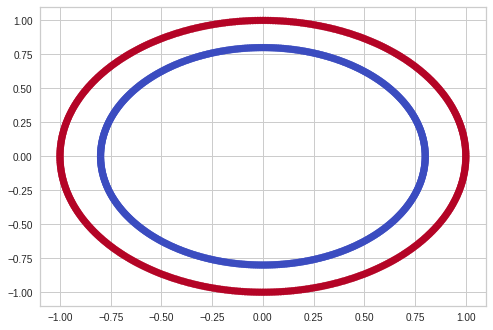

In [255]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap="coolwarm")
plt.show()

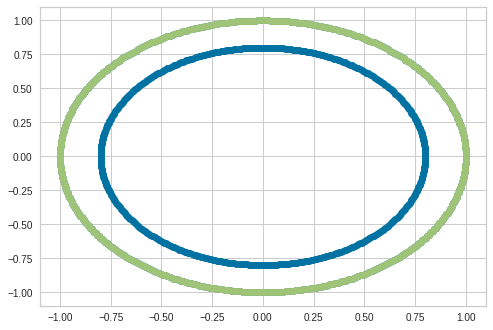

In [258]:
hull = ConvexHull(X)
plt.plot(X[:,0], X[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'c')
plt.plot(X[hull.vertices, 0], X[hull.vertices, 1], 'o', lw=2)
plt.show()